# Principal Component Analysis

- many algoirthms do not scale great with N_features
- fitting noise

Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data (and not only restricted to this).

In [2]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

## Curse of dimensionality

![](figures/lich640.jpg)

$\left. \dfrac{2r^d \pi^{d/2}}{d \Gamma(d/2)} \middle/ (2r)^{d} \right. = \dfrac{\pi^{d/2}}{d 2^{d-1} \Gamma(d/2)}\rightarrow 0$ as $d\rightarrow \infty$

## Garbage in – garbage out

Noisy data, irrelevant dimensions...

![](figures/garbage640.jpg)

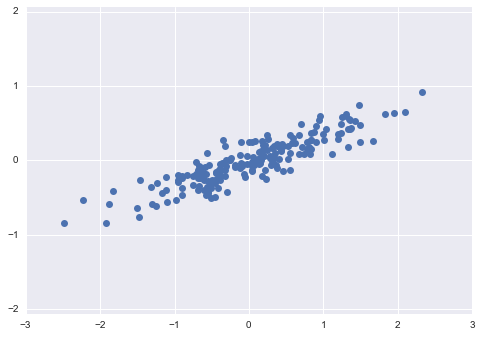

In [3]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

PCA finds the Principal Axes in the data

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[ 0.94446029  0.32862557]
 [ 0.32862557 -0.94446029]]


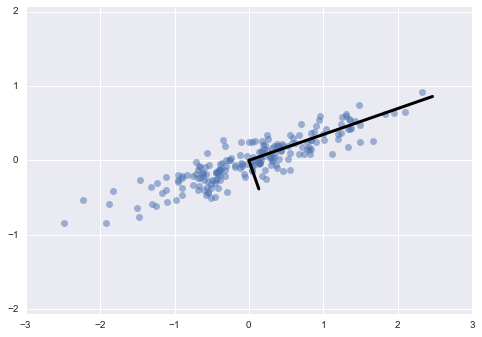

In [5]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

One vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.

The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be completely ignored without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [6]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

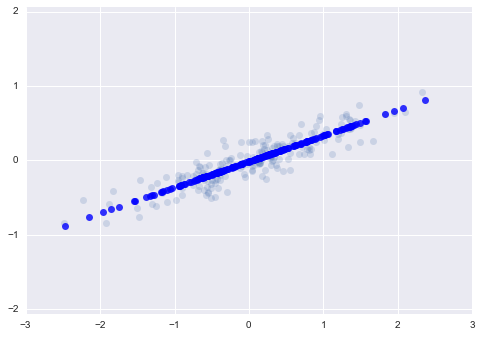

In [7]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data. You project it to new axis.

The *components* are the coefficients that define the linear transformation to the new basis.

## Choosing the Number of Components

In [9]:
# Read the data
datafile ='data/1_4_17_11_2013.csv'
data = np.genfromtxt(datafile , delimiter=',')
X, y = data[:,1:], data[:,0]
print("data shape: %r, target shape: %r" % (X.shape, y.shape))

data shape: (1805, 778), target shape: (1805,)


In [18]:
from scipy.stats import itemfreq
print(itemfreq(y))

[[  1.00000000e+00   2.38000000e+02]
 [  2.00000000e+00   2.62000000e+02]
 [  3.00000000e+00   1.25400000e+03]
 [  4.00000000e+00   5.10000000e+01]]


In [19]:
def get_color(x):
    return {
        1: 'm',
        2: 'g',
        3: 'b',
        4: 'r',
    }.get(x, 0)

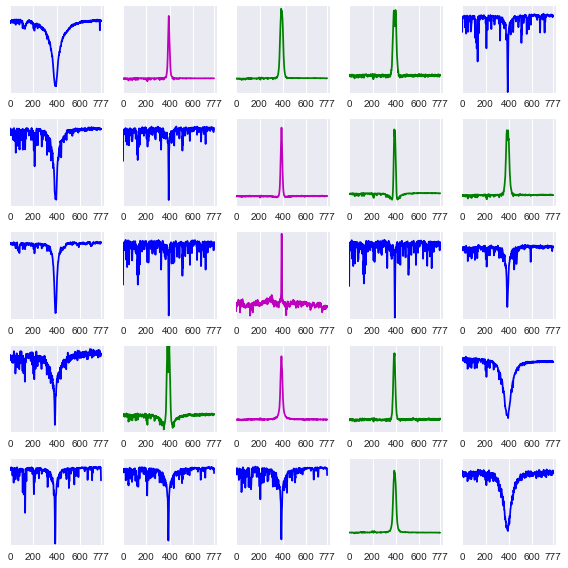

In [32]:
#Random 36 spectra from dataset
plt.figure(figsize=(8,8))
for i, j in enumerate(np.random.permutation(X.shape[0])[50:75]):
    plt.subplot(5, 5, (i + 1))
    plt.plot(X[j], c=get_color(y[j]))
    plt.xticks(([0, 200, 400, 600, 777])), plt.yticks(())
    plt.tight_layout()

In [37]:
import sklearn.preprocessing as pp
X_scaled = pp.scale(X) # make it mean=0, std=1

pca = PCA(n_components=778)
pca.fit(X_scaled)

PCA(copy=True, n_components=778, whiten=False)

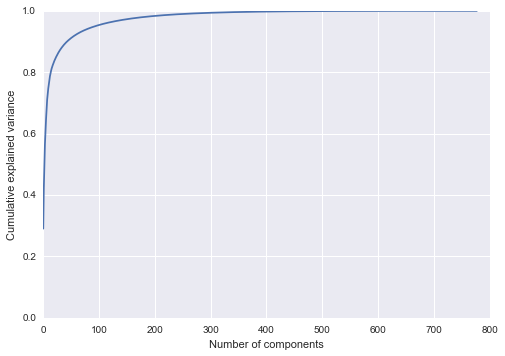

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.ylim(0., 1.00);

In [55]:
pca = PCA( n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [56]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=0)

In [57]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) # compare to n_components=778 (full)

             precision    recall  f1-score   support

        1.0       0.81      0.57      0.67        61
        2.0       0.72      0.59      0.65        74
        3.0       0.85      0.98      0.91       303
        4.0       0.00      0.00      0.00        14

avg / total       0.80      0.83      0.81       452

